In [1]:
# Dependencies and Setup

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from matplotlib import style
style.use('fivethirtyeight')

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

temp, humidity, clouds, wind, city_list, lat, lon, date, country = [], [], [], [], [], [], [], [], []
# Get weather data
for city in cities:
    query_url = url + "&q=" + city
    weather_response = requests.get(query_url)
    
    if weather_response.status_code == 404: #Check response status, skip request if it returns error
        next
    else:
        print(f"Processing Record {cities.index(city)+1} | {city}")
        print(query_url)
        weather_json = weather_response.json()
        city_list.append(city)
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        date.append(weather_json['dt'])
        country.append(weather_json['sys']['country'])

Processing Record 1 | maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=maldonado
Processing Record 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=jamestown
Processing Record 3 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=port elizabeth
Processing Record 4 | arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=arlit
Processing Record 5 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=ushuaia
Processing Record 6 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=flinders
Processing Record 8 | sharjah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=s

Processing Record 64 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=port alfred
Processing Record 65 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=bluff
Processing Record 66 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=tasiilaq
Processing Record 67 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=yellowknife
Processing Record 69 | bethlehem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=bethlehem
Processing Record 70 | maunabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=maunabo
Processing Record 71 | achalpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e

Processing Record 127 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=souillac
Processing Record 128 | otane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=otane
Processing Record 129 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=provideniya
Processing Record 130 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=butaritari
Processing Record 131 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=katsuura
Processing Record 132 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=tessalit
Processing Record 133 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57

Processing Record 188 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=half moon bay
Processing Record 190 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=kutum
Processing Record 193 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=kavaratti
Processing Record 194 | orebro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=orebro
Processing Record 195 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=clyde river
Processing Record 197 | marigot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=marigot
Processing Record 200 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab54

Processing Record 257 | inverness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=inverness
Processing Record 259 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=cidreira
Processing Record 260 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=vestmanna
Processing Record 261 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=qasigiannguit
Processing Record 262 | cao bang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=cao bang
Processing Record 263 | mugur-aksy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=mugur-aksy
Processing Record 264 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fc

Processing Record 322 | beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=beloha
Processing Record 323 | yuanping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=yuanping
Processing Record 324 | yaguajay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=yaguajay
Processing Record 325 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=cayenne
Processing Record 326 | salamiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=salamiyah
Processing Record 327 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=roma
Processing Record 328 | saint-francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=

Processing Record 383 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=yar-sale
Processing Record 384 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=ust-kuyga
Processing Record 385 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=marsh harbour
Processing Record 388 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=hambantota
Processing Record 389 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=poum
Processing Record 390 | celestun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=celestun
Processing Record 391 | susangerd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d5

Processing Record 450 | nordhorn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=nordhorn
Processing Record 451 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=saint anthony
Processing Record 452 | aurillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=aurillac
Processing Record 453 | helong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=helong
Processing Record 454 | batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=batagay
Processing Record 455 | primorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=primorsk
Processing Record 456 | shibetsu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab54

Processing Record 517 | udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=udachnyy
Processing Record 518 | staryy nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=staryy nadym
Processing Record 520 | murrhardt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=murrhardt
Processing Record 521 | barra da estiva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=barra da estiva
Processing Record 522 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=vostok
Processing Record 523 | gusau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=gusau
Processing Record 524 | monrovia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0

Processing Record 583 | umea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=umea
Processing Record 584 | ankang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=ankang
Processing Record 585 | pilar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=pilar
Processing Record 586 | greece
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=greece
Processing Record 587 | verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=verkhnyaya inta
Processing Record 588 | oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1a&q=oranjemund
Processing Record 589 | walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6e70a1ffc1fcf0323d57ab546ca5e1

In [24]:
df = pd.DataFrame({"City": city_list, "Country": country, "Temperature, F": temp, "Humidity (%)": humidity, 
                   "Cloudiness (%)" : clouds, "Wind Speed, mph": wind, "Latitude": lat, 
                   "Longitude": lon, "Date": date})
df = df[df['Humidity (%)'] < 100]
print(f"Request was processed for {len(city_list)} cities")
df.to_csv('out.csv')
df.head()

Request was processed for 560 cities


,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,"Temperature, F","Wind Speed, mph"
0,maldonado,20,UY,1536087600,67,-34.91,-54.96,59.00,11.41
1,jamestown,0,AU,1536088762,52,-33.21,138.60,38.89,10.00
2,port elizabeth,20,US,1536087360,57,39.31,-74.98,92.61,4.07
3,arlit,36,NE,1536089196,31,18.74,7.39,91.18,3.51
4,ushuaia,75,AR,1536087600,84,-54.81,-68.31,33.96,26.40


Observed Trend 1: 
This scatter plot demonstrates a correlation between Latitude and Temperatures
with temperatures being higher as we approach to the Equator.
However the Equator (or 0 Latitude) is not the peak point of the trend.
The highest temperatures were observed from 20 to 40 northern latitude
which is actually in line with our expectations.
Equatorial zone is a zone with tropical humid climate where temperatures do not 
vary significantly during the year. Whilst the area of 20-40 northern latitude is a 
zone of arid and semi-arid climate (Saudi Arabia, Sudan, Iraq etc) with 
extremely hot weather in Summer. Our observation took part in the middle July. 
Same observation performed during the year would move a peak point around 
the Equator shifting towards Southern Hemisphere during the Winter.


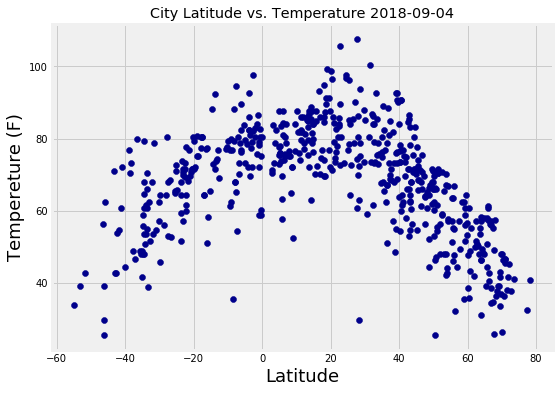

In [44]:
# Latitude vs. Temperature scatterplot
trend1 = f"Observed Trend 1: \n" +\
"This scatter plot demonstrates a correlation between Latitude and Temperatures\n" +\
"with temperatures being higher as we approach to the Equator.\n" +\
"However the Equator (or 0 Latitude) is not the peak point of the trend.\n" +\
"The highest temperatures were observed from 20 to 40 northern latitude\n" +\
"which is actually in line with our expectations.\n" +\
"Equatorial zone is a zone with tropical humid climate where temperatures do not \n" +\
"vary significantly during the year. Whilst the area of 20-40 northern latitude is a \n" +\
"zone of arid and semi-arid climate (Saudi Arabia, Sudan, Iraq etc) with \n" +\
"extremely hot weather in Summer. Our observation took part in the middle July. \n" +\
"Same observation performed during the year would move a peak point around \n" +\
"the Equator shifting towards Southern Hemisphere during the Winter."
print(trend1)
plt.figure(figsize=(8,6))
plt.scatter(lat, temp, marker="o", facecolors = "darkblue")
# plt.grid()
plt.title(f"City Latitude vs. Temperature {str(datetime.datetime.today()).split()[0]}")
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Tempereture (F)", fontsize=18)
# plt.text(90, 25, trend1, fontsize=14,)
plt.savefig("LatitudeVsTemperature.png")

plt.show()

Observed Trend 2: 
This scatterplot is not very represenatative. This can be explained by the fact 
that Humidity is driven mostly by closeness to the ocean, season (dry or wet 
in South East Asia) etc. rather than Latitude It can be 90% Humid deep in Siberia and 
in Thailand. In this case scatterplot Humidity vs Longitude could be be more illustrative. 
Please, see next chart.


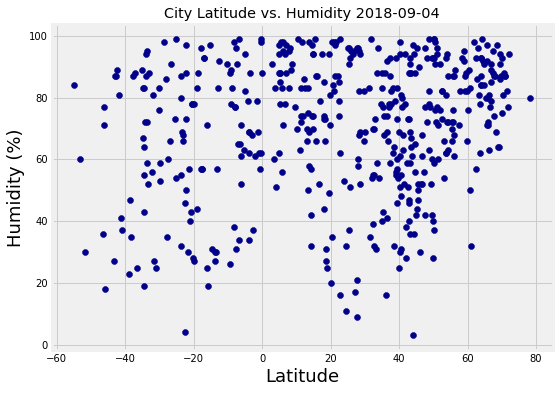

In [45]:
# Latitude vs. Humidity scatterplot\
trend2 = f"Observed Trend 2: \n" +\
"This scatterplot is not very represenatative. This can be explained by the fact \n" +\
"that Humidity is driven mostly by closeness to the ocean, season (dry or wet \n" +\
"in South East Asia) etc. rather than Latitude It can be 90% Humid deep in Siberia and \n" +\
"in Thailand. In this case scatterplot Humidity vs Longitude could be be more illustrative. \n" +\
"Please, see next chart."
print(trend2)
plt.figure(figsize=(8,6))
plt.scatter(df['Latitude'], df['Humidity (%)'], marker="o", facecolors = "darkblue")
# plt.grid()
plt.title(f"City Latitude vs. Humidity {str(datetime.datetime.today()).split()[0]}")
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Humidity (%)", fontsize=18)
# plt.text(90, 70, trend2, fontsize=14,)
plt.savefig("latitudeVsHumidity.png")

plt.show()

Observed Trend 3: 
There is some pattern here. Humidity 80%-100% is cocentrated in the area 
of -100~-50 Longitude and 0~50 Longitude. We traced it to a Goole map and it 
turned to be Pacific coast of Americas, Atlantic coast of Americas and Atlantic 
coast of Europe (Great Britain etc.) A lot of observations concentrated around the 
point of 80% Humidity in 100~110 Longitude which is a humid South-East Asia region 
surrounded by Idian ocean. In my opinion this Graph is more representative and looks  
like a World Ocean map though still it doesn't cover many factors.



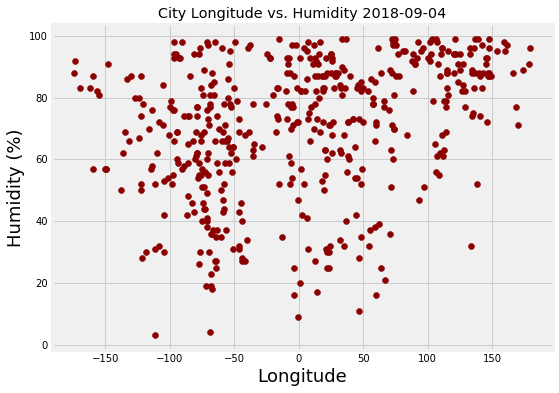

In [46]:
# Longitude vs. Humidity scatterplot
trend3 = f"Observed Trend 3: \n" +\
"There is some pattern here. Humidity 80%-100% is cocentrated in the area \n" +\
"of -100~-50 Longitude and 0~50 Longitude. We traced it to a Goole map and it \n" +\
"turned to be Pacific coast of Americas, Atlantic coast of Americas and Atlantic \n" +\
"coast of Europe (Great Britain etc.) A lot of observations concentrated around the \n" +\
"point of 80% Humidity in 100~110 Longitude which is a humid South-East Asia region \n" +\
"surrounded by Idian ocean. In my opinion this Graph is more representative and looks  \n" +\
"like a World Ocean map though still it doesn't cover many factors.\n"
print(trend3)
plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Humidity (%)'], marker="o", facecolors = "darkred")
# plt.grid()
plt.title(f"City Longitude vs. Humidity {str(datetime.datetime.today()).split()[0]}")
plt.xlabel("Longitude", fontsize=18)
plt.ylabel("Humidity (%)", fontsize=18)
# plt.text(210, 45, trend3, fontsize=14,)
plt.savefig("LongitudeVsHumidity.png")

plt.show()

Observed Trend 4: 
There is no trend on this scatterplot that could demonstrate us any  
realation between Latitude and Cloudiness. Maybe results would be 
more representative if we observed data at the same time of the day (at noon for example). 
No conclusions can be made based on this scatterplot.


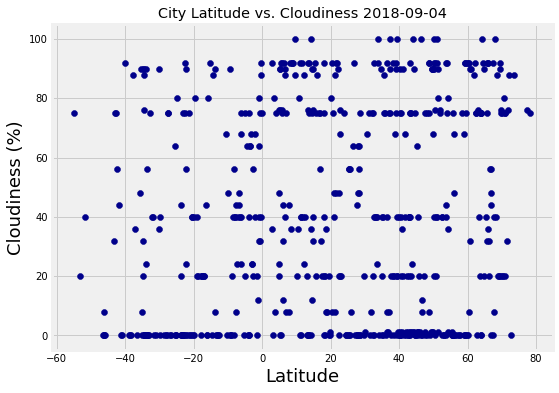

In [47]:
# Latitude vs. Cloudiness scatterplot
trend4 = f"Observed Trend 4: \n" +\
"There is no trend on this scatterplot that could demonstrate us any  \n" +\
"realation between Latitude and Cloudiness. Maybe results would be \n" +\
"more representative if we observed data at the same time of the day (at noon for example). \n" +\
"No conclusions can be made based on this scatterplot."
print (trend4)
plt.figure(figsize=(8,6))
plt.scatter(lat, clouds, marker="o", facecolors = "darkblue")
# plt.grid()
plt.title(f"City Latitude vs. Cloudiness {str(datetime.datetime.today()).split()[0]}")
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Cloudiness (%)", fontsize=18)
# plt.text(90, 70, trend4, fontsize=14,)
plt.savefig("LatitudeVsCloudiness.png")

plt.show()

Observed Trend 5: 
There is no trend on this scatterplot that could demonstrate us any realation 
between Latitude and Wind Speed. We can only see that the observed data 
concentrated arount the average of 8.29 mph regardless of Latitudes 
with some ouliers that gan be ignored in this study.


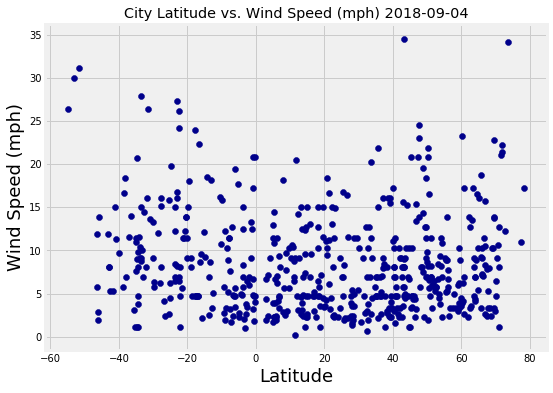

In [48]:
# Latitude vs. Wind Speed scatterplot
windmean = round(df["Wind Speed, mph"].mean(),2)
trend5 = f"Observed Trend 5: \n" +\
f"There is no trend on this scatterplot that could demonstrate us any realation \n" +\
f"between Latitude and Wind Speed. We can only see that the observed data \n"  +\
f"concentrated arount the average of {windmean} mph regardless of Latitudes \n"  +\
f"with some ouliers that gan be ignored in this study."
print(trend5)
plt.figure(figsize=(8,6))
plt.scatter(lat, wind, marker="o", facecolors = "darkblue")
# plt.grid()
plt.title(f"City Latitude vs. Wind Speed (mph) {str(datetime.datetime.today()).split()[0]}")
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Wind Speed (mph)", fontsize=18)
# plt.text(90, 20, trend5, fontsize=14,)
plt.savefig("LatitudeVsWindSpeed.png")

plt.show()